In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Yearly rainfall csv file downloaded from NCDC
Used Red River Valley region

https://www.ncdc.noaa.gov/cag/regional/time-series/208/pcp/12/12/1895-2018?base_prd=true&firstbaseyear=1901&lastbaseyear=2000&filter=true&filterType=binomial

In [3]:
rainfalls = pd.read_csv('yearlyrain.csv', skiprows=4)
# Note the date format is 'yyyymm' so date//100 gives the year

Quick time series plot with desired levels for each color

Color boundaries:  [ 22.5  27.5  32.5  37.5]  (in)


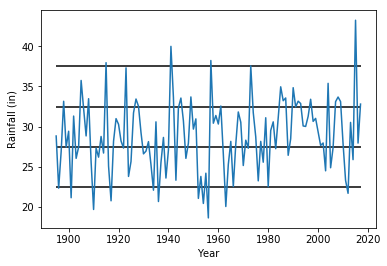

In [4]:
divisions = 4
dlevels   = np.linspace(22.5,37.5,divisions)
print ('Color boundaries: ', dlevels, ' (in)')

plt.plot(rainfalls.Date//100,rainfalls.Value)
plt.hlines(dlevels,rainfalls.Date.min()//100,rainfalls.Date.max()//100)
plt.ylabel('Rainfall (in)')
plt.xlabel('Year')
plt.show()

### Test plot of colored waves

In [5]:
width    = 30 # Completely arbitrary 
grid_c = np.ones((width,len(rainfalls.Value)))*np.array(rainfalls.Value) # Color values
quicky   = rainfalls.Date//100
quickx   = np.arange(0,width,1)
quickgrid = np.meshgrid(quickx,quicky)

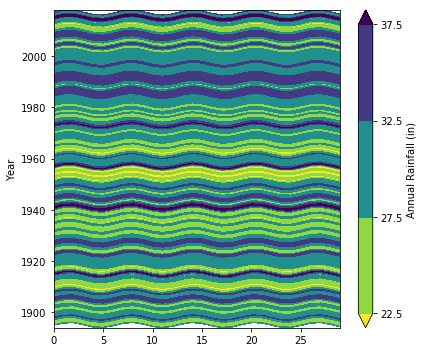

In [10]:
plt.figure(figsize=(6,5))
plt.contourf(quickgrid[0],quickgrid[1]+1*np.sin(np.arange(0,width,1)),
             grid_c.T,cmap='viridis_r',levels=dlevels,extend='both')
plt.colorbar(label='Annual Rainfall (in)')
plt.ylabel('Year')
# plt.savefig('rainfallblanket.png')
plt.tight_layout()

### Assign written colors based on the viridis cmap 

#### Write out a csv file for reference
Columns: Date (yyyymm), Rainfall value (in), anomaly (in), color


In [7]:
c_list = ['yellow','green','teal','blue','dark']

yarn = np.empty(len(rainfalls.Value),dtype='object') # Text array
yarn[(rainfalls.Value<dlevels[0])] = c_list[0] # Everything below lowest value 
yarn[(rainfalls.Value>=dlevels[0])&(rainfalls.Value<dlevels[1])] = c_list[1]
yarn[(rainfalls.Value>=dlevels[1])&(rainfalls.Value<dlevels[2])] = c_list[2]
yarn[(rainfalls.Value>=dlevels[2])&(rainfalls.Value<dlevels[3])] = c_list[3]
yarn[(rainfalls.Value>=dlevels[3])] = c_list[4]

rainfalls = rainfalls.assign(colors=pd.Series(yarn)) # assign to dataframe

# rainfalls.to_csv('colorlist.csv') # write out

### Number of rows of each color

(array([ 11.,  37.,  48.,  22.,   5.]),
 array([ 15. ,  22.5,  27.5,  32.5,  37.5,  45. ]),
 <a list of 5 Patch objects>)

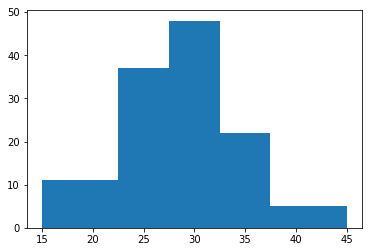

In [8]:
plt.hist(rainfalls.Value, 
         bins=np.hstack((15,dlevels,45))) # 15, 45 are arbitraty to include all values

### Gauge to yarn length calculations

* Needed 13 m (169 in) of yarn for 3 rows of DC to create 4 x 23 cm (1.56 x 8.97 in) gauge
* Estimating a throw blanket width of 50 in (typically 52 by 60 in)

In [12]:
rows = 3
gauge = 8.97 # (in of width)
yarn_use = 507 # (inches used)
yards_per_skein = 209 # For the Berroco Modern Cotton worsted weight
desired_width = 50 # (in)

yarn_per_in = yarn_use / (rows * gauge)
yards_per_row = desired_width*yarn_per_in/(3*12)

In [14]:
total_yards = yards_per_row*np.array([ 11.,  37.,  48.,  22.,   5.]) # Copied from histogram
total_skeins = total_yards/yards_per_skein 
for i in range(5):
    print (c_list[i],' skeins needed: ', total_skeins[i])

yellow  skeins needed:  1.37723535893
green  skeins needed:  4.63251893458
teal  skeins needed:  6.00975429351
blue  skeins needed:  2.75447071786
dark  skeins needed:  0.62601607224
